In [11]:
import numpy as np
import matplotlib.pyplot as plt

import aero_model
import dynamic
# Modèle d'avion
aircraft = aero_model.Airbus_A319_100()

<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:18: SyntaxWarning: invalid escape sequence '\d'
C:\Users\robertma\AppData\Local\Temp\ipykernel_10944\1074609062.py:14: SyntaxWarning: invalid escape sequence '\d'
  plt.plot(alphas, CL, label=f"$\delta_{{trim}}$ = {delta_trim_deg}°")
C:\Users\robertma\AppData\Local\Temp\ipykernel_10944\1074609062.py:18: SyntaxWarning: invalid escape sequence '\d'
  plt.title("$C_L$ en fonction de l'incidence α pour différentes valeurs de $\delta_{trim}$")


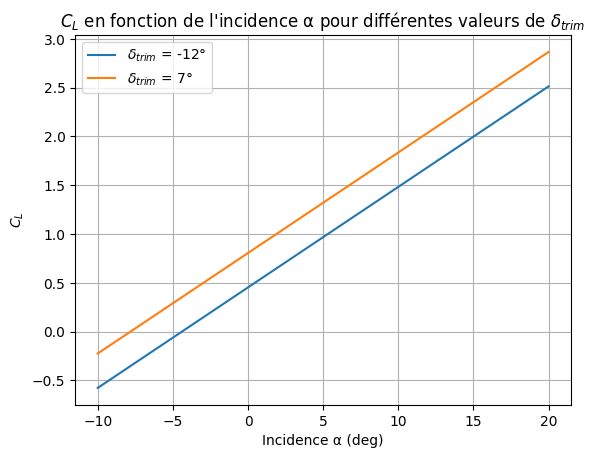

In [12]:
aircraft.set_options(stall=False, buffeting=False, wave_drag=False)  # Décrochage non pris en compte

alphas = np.linspace(-10, 20, 100)  # en degrés
alphas_rad = np.deg2rad(alphas)
delta_trims_deg = [-12, 7]  # en degrés
delta_trims_rad = np.deg2rad(delta_trims_deg)

for delta_trim, delta_trim_deg in zip(delta_trims_rad, delta_trims_deg):
    CL = []
    for alpha in alphas_rad:
        cz, _, _ = aircraft.get_aero_coefs(alpha, mach=0.4, dtrim=delta_trim, dm=0, q=0, tas=70)
        CL.append(cz)
    plt.plot(alphas, CL, label=f"$\delta_{{trim}}$ = {delta_trim_deg}°")

plt.xlabel("Incidence α (deg)")
plt.ylabel("$C_L$")
plt.title("$C_L$ en fonction de l'incidence α pour différentes valeurs de $\delta_{trim}$")
plt.legend()
plt.grid()
plt.show()

<>:34: SyntaxWarning: invalid escape sequence '\d'
<>:34: SyntaxWarning: invalid escape sequence '\d'
C:\Users\robertma\AppData\Local\Temp\ipykernel_10944\2775550239.py:34: SyntaxWarning: invalid escape sequence '\d'
  plt.title("Polaire aérodynamique $C_L = f(C_D)$ pour $\delta_{trim}=0$")


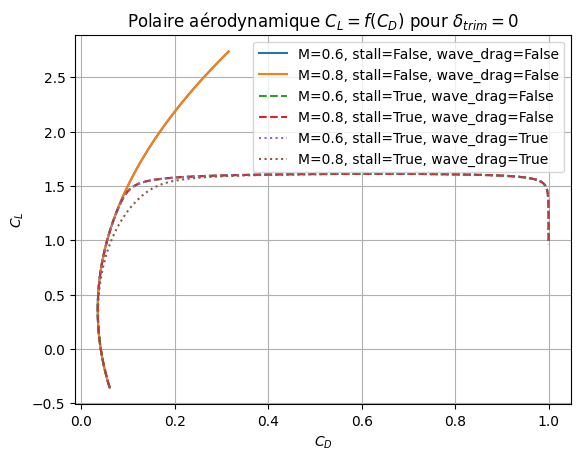

In [13]:
mach_numbers = [0.6, 0.8]
# Cas 1 : Sans décrochage, sans traînée d'onde
aircraft.set_options(stall=False, buffeting=False, wave_drag=False)
for mach in mach_numbers:
    CL, CD = [], []
    for alpha in alphas_rad:
        cz, cx, _ = aircraft.get_aero_coefs(alpha, mach=mach, dtrim=0, dm=0, q=0, tas=70)
        CL.append(cz)
        CD.append(cx)
    plt.plot(CD, CL, label=f"M={mach}, stall=False, wave_drag=False")

# Cas 2 : Avec décrochage, sans traînée d'onde
aircraft.set_options(stall=True, buffeting=False, wave_drag=False)
for mach in mach_numbers:
    CL, CD = [], []
    for alpha in alphas_rad:
        cz, cx, _ = aircraft.get_aero_coefs(alpha, mach=mach, dtrim=0, dm=0, q=0, tas=70)
        CL.append(cz)
        CD.append(cx)
    plt.plot(CD, CL, '--', label=f"M={mach}, stall=True, wave_drag=False")

# Cas 3 : Avec décrochage et traînée d'onde
aircraft.set_options(stall=True, buffeting=False, wave_drag=True)
for mach in mach_numbers:
    CL, CD = [], []
    for alpha in alphas_rad:
        cz, cx, _ = aircraft.get_aero_coefs(alpha, mach=mach, dtrim=0, dm=0, q=0, tas=70)
        CL.append(cz)
        CD.append(cx)
    plt.plot(CD, CL, ':', label=f"M={mach}, stall=True, wave_drag=True")

plt.xlabel("$C_D$")
plt.ylabel("$C_L$")
plt.title("Polaire aérodynamique $C_L = f(C_D)$ pour $\delta_{trim}=0$")
plt.legend()
plt.grid()
plt.show()

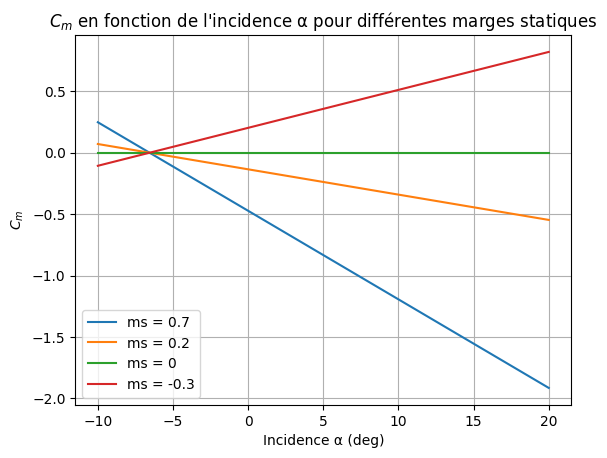

In [14]:
static_margins = [0.7, 0.2, 0, -0.3]
aircraft.set_options(stall=False, buffeting=False, wave_drag=False)
for ms in static_margins:
    aircraft.set_static_margin(ms)
    Cm = []
    for alpha in alphas_rad:
        # Cm = coefficient de moment de tangage en G
        _, _, cm = aircraft.get_aero_coefs(alpha, mach=0.4, dtrim=0, dm=0, q=0, tas=70)
        Cm.append(cm)
    plt.plot(alphas, Cm, label=f"ms = {ms}")

plt.xlabel("Incidence α (deg)")
plt.ylabel("$C_m$")
plt.title("$C_m$ en fonction de l'incidence α pour différentes marges statiques")
plt.legend()
plt.grid()
plt.show()

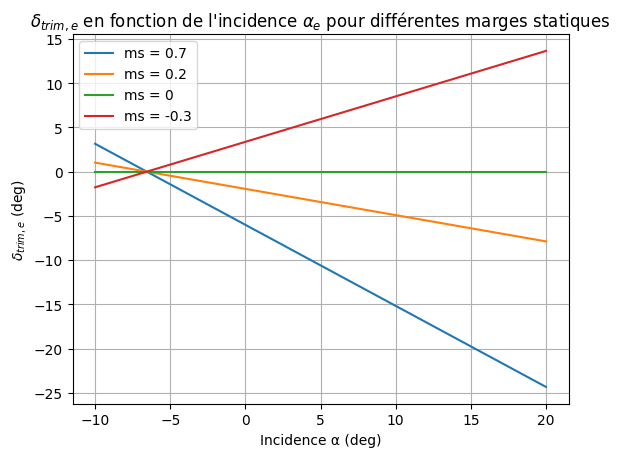

In [15]:
static_margins = [0.7, 0.2, 0, -0.3]

for ms in static_margins:
    aircraft.set_static_margin(ms)
    # Récupération des coefficients du modèle
    C_m0 = aircraft.cm0
    C_malpha = aircraft.cma
    alpha0 = aircraft.a0
    C_mtrim = aircraft.cmtrim

    delta_trim_e = []
    for alpha in alphas_rad:
        # Formule analytique
        delta_trim = -(C_m0 + C_malpha * (alpha - alpha0)) / C_mtrim
        delta_trim_e.append(np.rad2deg(delta_trim))  # Conversion en degrés pour lecture

    plt.plot(alphas, delta_trim_e, label=f"ms = {ms}")

plt.xlabel("Incidence α (deg)")
plt.ylabel(r"$\delta_{trim,e}$ (deg)")
plt.title(r"$\delta_{trim,e}$ en fonction de l'incidence $\alpha_e$ pour différentes marges statiques")
plt.legend()
plt.grid()
plt.show()

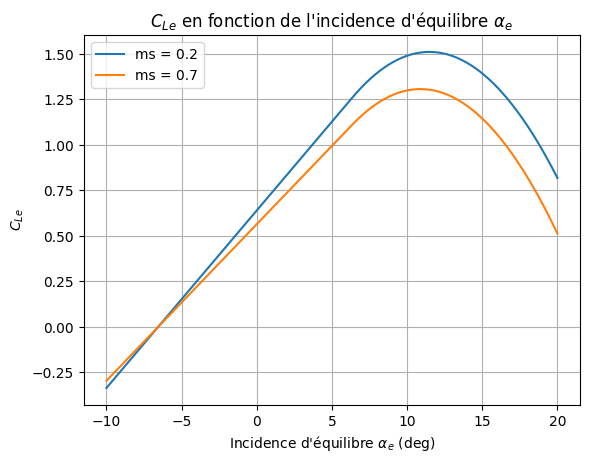

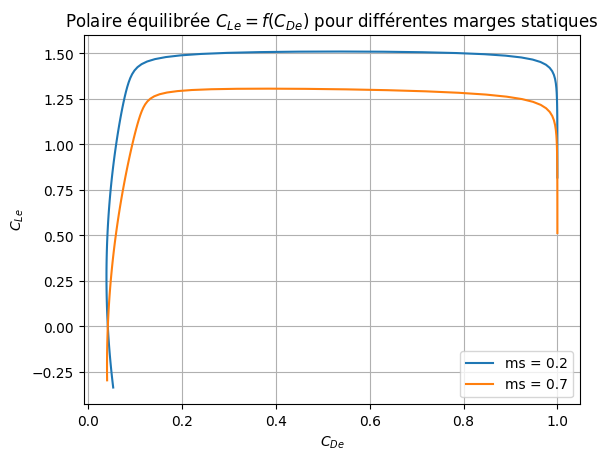

In [105]:
aircraft.set_options(stall=True, buffeting=False, wave_drag=False)

alphas = np.linspace(-10, 20, 100)  # en degrés
alphas_rad = np.deg2rad(alphas)
static_margins = [0.2, 0.7]

plt.figure()
for ms in static_margins:
    aircraft.set_static_margin(ms)
    CL_e = []
    for alpha in alphas_rad:
        # Calcul analytique de delta_trim_e pour Cm=0
        C_m0 = aircraft.cm0
        C_malpha = aircraft.cma
        alpha0 = aircraft.a0
        C_mtrim = aircraft.cmtrim
        delta_trim_e = -(C_m0 + C_malpha * (alpha - alpha0)) / C_mtrim
        # Calcul du CL à l'équilibre
        cz, _, _ = aircraft.get_aero_coefs(alpha, mach=0.4, dtrim=delta_trim_e, dm=0, q=0, tas=70)
        CL_e.append(cz)
    plt.plot(alphas, CL_e, label=f"ms = {ms}")

plt.xlabel("Incidence d'équilibre $\\alpha_e$ (deg)")
plt.ylabel("$C_{Le}$")
plt.title("$C_{Le}$ en fonction de l'incidence d'équilibre $\\alpha_e$")
plt.legend()
plt.grid()
plt.show()

# Polaire équilibrée C_Le = f(C_De)
plt.figure()
for ms in static_margins:
    aircraft.set_static_margin(ms)
    CL_e = []
    CD_e = []
    for alpha in alphas_rad:
        C_m0 = aircraft.cm0
        C_malpha = aircraft.cma
        alpha0 = aircraft.a0
        C_mtrim = aircraft.cmtrim
        delta_trim_e = -(C_m0 + C_malpha * (alpha - alpha0)) / C_mtrim
        # Calcul du CL et CD à l'équilibre
        cz, cx, _ = aircraft.get_aero_coefs(alpha, mach=aircraft.mach_design, dtrim=delta_trim_e, dm=0, q=0, tas=70)
        CL_e.append(cz)
        CD_e.append(cx)
    plt.plot(CD_e, CL_e, label=f"ms = {ms}")

plt.xlabel("$C_{De}$")
plt.ylabel("$C_{Le}$")
plt.title("Polaire équilibrée $C_{Le} = f(C_{De})$ pour différentes marges statiques")
plt.legend()
plt.grid()
plt.show()

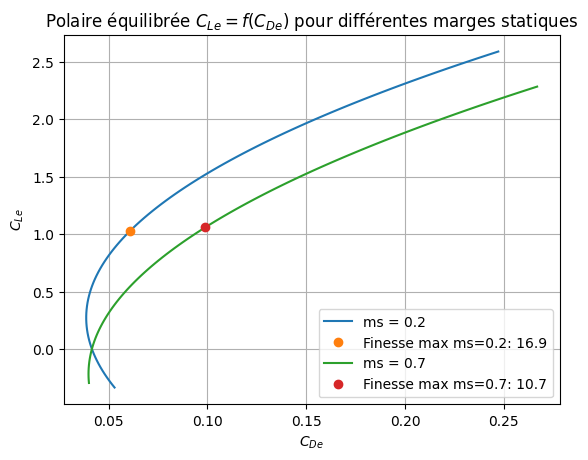

Finesse maximale pour ms=0.2 : 16.91
Finesse maximale pour ms=0.7 : 10.71


In [106]:
static_margins = [0.2, 0.7]
aircraft.set_options(stall=False, buffeting=False, wave_drag=False)
plt.figure()
max_lod = {}

for ms in static_margins:
    aircraft.set_static_margin(ms)
    CL_e = []
    CD_e = []
    LOD = []
    for alpha in alphas_rad:
        # Calcul analytique de delta_trim_e pour Cm=0
        C_m0 = aircraft.cm0
        C_malpha = aircraft.cma
        alpha0 = aircraft.a0
        C_mtrim = aircraft.cmtrim
        delta_trim_e = -(C_m0 + C_malpha * (alpha - alpha0)) / C_mtrim
        # Calcul du CL et CD à l'équilibre
        cz, cx, _ = aircraft.get_aero_coefs(alpha, mach=0.4, dtrim=delta_trim_e, dm=0, q=0, tas=70)
        CL_e.append(cz)
        CD_e.append(cx)
        if cx != 0:
            LOD.append(cz/cx)
        else:
            LOD.append(np.nan)
    plt.plot(CD_e, CL_e, label=f"ms = {ms}")
    # Calcul de la finesse maximale
    max_lod[ms] = np.nanmax(LOD)
    idx_max = np.nanargmax(LOD)
    plt.plot(CD_e[idx_max], CL_e[idx_max], 'o', label=f"Finesse max ms={ms}: {max_lod[ms]:.1f}")

plt.xlabel("$C_{De}$")
plt.ylabel("$C_{Le}$")
plt.title("Polaire équilibrée $C_{Le} = f(C_{De})$ pour différentes marges statiques")
plt.legend()
plt.grid()
plt.show()

for ms in static_margins:
    print(f"Finesse maximale pour ms={ms} : {max_lod[ms]:.2f}")

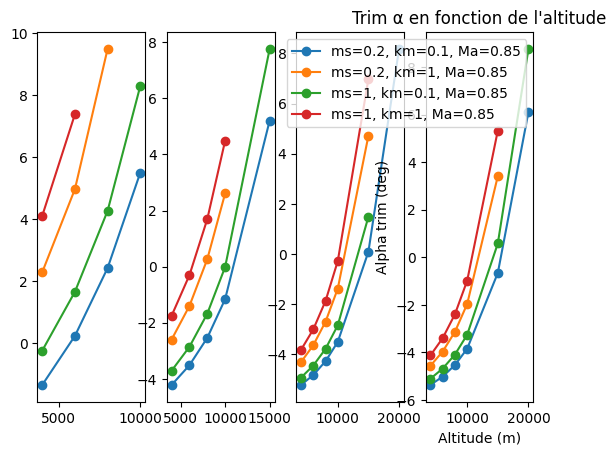

In [107]:


aircraft.set_options(stall=True, buffeting=False, wave_drag=True)
altitudes = [4000, 6000, 8000, 10000, 15000 ,20000] 
mach_numbers = [0.4, 0.6, 0.8, 0.85]
static_margins = [0.2, 1]
km_values = [0.1, 1]



results = []

for ms in static_margins:
    for km in km_values:
        aircraft.set_static_margin(ms)
        mass = aircraft.set_mass_from_km(km)
        for Ma in mach_numbers:
            for hG in altitudes:
                tas = aircraft.atm.tas_from_mach_altp(Ma, hG)
                try:
                    trim = dynamic.get_trim_level_flight(aircraft, hG, tas)
                    results.append({
                        "hG": hG,
                        "Ma": Ma,
                        "ms": ms,
                        "km": km,
                        "aoa_deg": np.rad2deg(trim["aoa"][0]),
                        "dtrim_deg": np.rad2deg(trim["dtrim"][0]),
                        "dthr": trim["dthr"][0]
                    })
                except Exception as e:
                    results.append({
                        "hG": hG,
                        "Ma": Ma,
                        "ms": ms,
                        "km": km,
                        "aoa_deg": np.nan,
                        "dtrim_deg": np.nan,
                        "dthr": np.nan
                    })

import pandas as pd
df = pd.DataFrame(results)
for ms in static_margins:
    for km in km_values:
        for i,Ma in enumerate(mach_numbers):
            plt.subplot(1,len(mach_numbers),i+1)
            subset = df[(df.ms == ms) & (df.km == km) & (df.Ma == Ma)]
            plt.plot(subset.hG, subset.aoa_deg, marker='o', label=f"ms={ms}, km={km}, Ma={Ma}")
plt.xlabel("Altitude (m)")
plt.ylabel("Alpha trim (deg)")
plt.title("Trim α en fonction de l'altitude")
plt.legend()
plt.show()


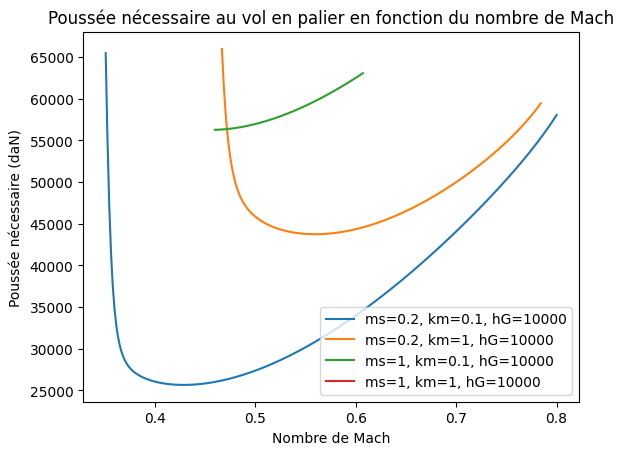

In [108]:
for ms in static_margins:
    for km in km_values:
        aircraft.set_static_margin(ms)
        mass = aircraft.set_mass_from_km(km)
        for hG in [10000]:
            machs = np.linspace(0.1, 0.8, 400)
            pouss = []
            for Ma in machs:
                tas = aircraft.atm.tas_from_mach_altp(Ma, hG)
                try:
                    trim = dynamic.get_trim_level_flight(aircraft, hG, tas, use_saturations=True)
                    pouss.append(trim["fu"][0])  
                except Exception as e:
                    pouss.append(np.nan)

            plt.plot(machs, pouss, label=f"ms={ms}, km={km}, hG={hG}")
plt.xlabel("Nombre de Mach")
plt.ylabel("Poussée nécessaire (daN)")
plt.title("Poussée nécessaire au vol en palier en fonction du nombre de Mach")
plt.legend()
plt.show()


[np.float64(0.16061493743468436), np.float64(0.18143006148577315), np.float64(0.20224518553686188), np.float64(0.22306030958795064), np.float64(0.24387543363903935), np.float64(0.2646905576901281), np.float64(0.2855056817412168), np.float64(0.3063208057923056), np.float64(0.3271359298433944), np.float64(0.34795105389448316), np.float64(0.36876617794557187), np.float64(0.3895813019966606), np.float64(0.4103964260477494), np.float64(0.43121155009883816), np.float64(0.4520266741499269), np.float64(0.4728417982010157), np.float64(0.49365692225210434), np.float64(0.5144720463031931), np.float64(0.5352871703542819), np.float64(0.5561022944053706), np.float64(0.5769174184564595), np.float64(0.5977325425075481), np.float64(0.6185476665586369), np.float64(0.6393627906097257), np.float64(0.6601779146608143), np.float64(0.6809930387119031), np.float64(0.7018081627629918), np.float64(0.7226232868140806), np.float64(0.7434384108651694), np.float64(0.7642535349162582), np.float64(0.785068658967347),

C:\Users\mathi\AppData\Local\Temp\ipykernel_16008\3614509082.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


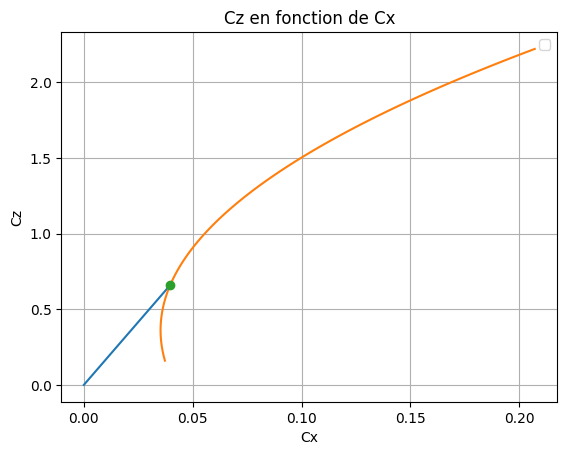

In [ ]:
# ...existing code...
import matplotlib.pyplot as plt
import numpy as np
import aero_model
import dynamic

aircraft = aero_model.Airbus_A320_200()
mass =  aircraft.mtom
colors = ['b', 'r']

aircraft.set_mass(mass)
aoa_range = np.linspace(np.deg2rad(-5), np.deg2rad(15), 100)
cz = []
cx = []
l = []

for aoa in aoa_range:
    cz_, cx_, _ = aircraft.get_aero_coefs(aoa, aircraft.mach_design, 0, 0, 0, 230)
    cz.append(cz_)
    cx.append(cx_)
    l.append((cx_, cz_, cz_/(cx_)**2))
print(cz)
print(cx)
print(l)
coup = max(l, key=lambda x: x[2])
print(coup)
a = [0, coup[0]]
b = [0, coup[1]]

plt.plot(a,b)
plt.plot(cx, cz)
plt.plot(coup[0],(coup[1]), 'o')

    
plt.xlabel("Cx")
plt.ylabel("Cz")
plt.title("Cz en fonction de Cx")
plt.legend()
plt.grid()
plt.show()

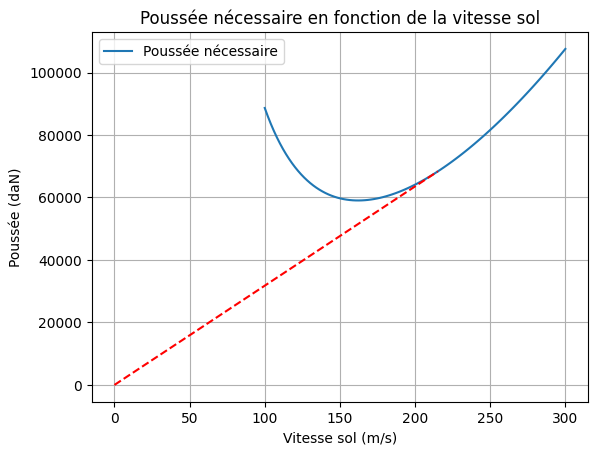

In [274]:
#diagramme de poussée 

tas = np.linspace(100, 300, 100)  # Vitesse sol en m/s
thrust = []
l = []
for v in tas:
    try:
        trim = dynamic.get_trim_level_flight(aircraft, 10000, v)
        thrust.append(trim["fu"][0])  # Poussée nécessaire
        l.append((v, trim["fu"][0], trim["fu"][0]/(v)))
    except Exception as e:
        thrust.append(np.nan)

minimal = min(l, key=lambda x: x[2])
plt.plot(tas, thrust, label="Poussée nécessaire")
plt.xlabel("Vitesse sol (m/s)")
plt.ylabel("Poussée (daN)")
plt.title("Poussée nécessaire en fonction de la vitesse sol")
plt.legend()
plt.plot([0,minimal[0]], [0,minimal[1]], 'r--')
plt.grid()
plt.show()

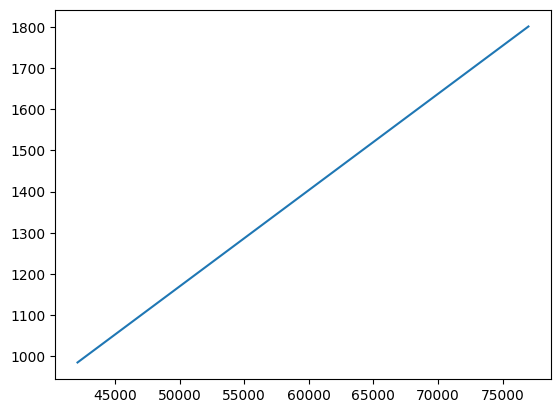

In [275]:
fn = []
masses = np.linspace(aircraft.oem, aircraft.mtom, 100)
for mass in masses:
    aircraft.set_mass(mass)
    fn.append(mass * 9.81 / coup[2])

plt.figure()
plt.plot(masses, fn)
plt.show()


77349.30326575566
79554.5721866748
81861.79665419333
84274.91504972725
86798.0616205559
89435.573434815
92191.9968373528
95072.09318351776
98080.84360375049
101223.45249354404
104505.34937269877
107932.18869776644
111509.84714670837
115244.4178255257
119142.20077446238
123209.68907857453
127453.54981729633
131880.59902405334
136497.76977657297
46710.617298501114
47261.78497898311
47874.55811595245
48550.559749984255
49291.51357695972
50099.249563712416
50975.70993690721
51922.955570073405
52943.17279466179
54038.68066172646
55211.938681251726
56465.55506613215
57802.2955072196
59225.09250448796
60737.05527700073
62341.48027093253
64041.86227827164
65841.90617500503
67745.5392723094
69756.92426594268
71880.4727492166
74120.85923377084
76483.03559439142
78972.24581917778
81594.0409029919
84354.29366879181
87259.21323725427
90315.35878192786
93529.65212675327
96909.38861200059
100462.24554449352
104196.28738897183
46152.20702388638
45723.18962493521
45348.81975503972
45029.706898013406
44

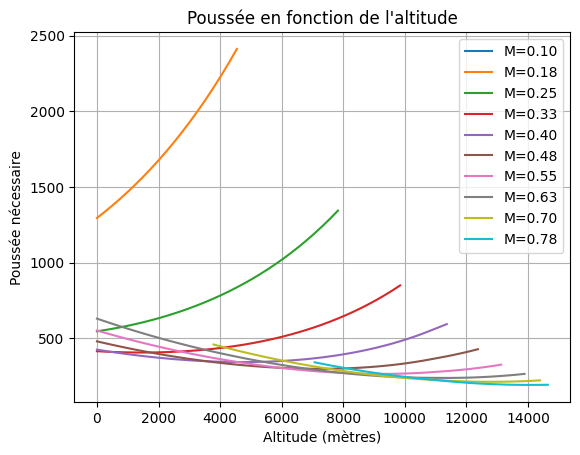

In [350]:
f = []
h = np.linspace(0, 25000, 100)  # Altitude en pieds
mach_numbers = np.linspace(0.1, 0.78, 10)  # Nombre de Mach
aircraft.set_static_margin(0.2)
plt.figure()
for mach in mach_numbers:
    f = []
    for altitude in h:
        tas = aircraft.atm.tas_from_mach_altp(mach, altitude)  # Vitesse indiquée en m/s
        aircraft.set_mass(aircraft.mtom)  # Set mass to MTOM for
        try:
            trim = dynamic.get_trim_level_flight(aircraft, altitude, tas, use_saturations=True)
            cz_, cx_, _ =aircraft.get_aero_coefs(trim["aoa"][0], mach, trim["dtrim"][0], 0, 0, tas)
            f.append(trim["fu"][0]/tas)
            print(trim["fu"][0])
        except Exception as e:
            f.append(np.nan)
    plt.plot(h, f)

plt.legend([f"M={mach:.2f}" for mach in mach_numbers])
plt.xlabel("Altitude (mètres)")
plt.ylabel("Poussée nécessaire")
plt.title("Poussée en fonction de l'altitude")
plt.grid()
plt.show()

43333.10469664121


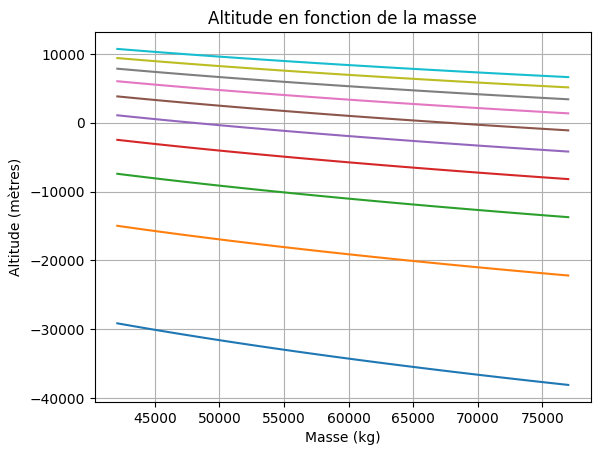

In [392]:
mass = np.linspace(aircraft.oem, aircraft.mtom, 100)  # Masse en kg

plt.figure()
for v in mach_numbers:
    alt = []
    for m in mass:
        aircraft.set_mass(m)
        aoa_range = np.linspace(np.deg2rad(-5), np.deg2rad(15), 100)
        cz = []
        cx = []
        l = []

        for aoa in aoa_range:
            cz_, cx_, _ = aircraft.get_aero_coefs(aoa, v, 0, 0, 0, 1)
            cz.append(cz_)
            cx.append(cx_)
            l.append((cx_, cz_, cz_/(cx_)**2))
        coup = max(l, key=lambda x: x[2])

        P = 2*(m)*9.81 / ((1.4/2) * aircraft.w.s * v**2 * coup[1])
        alt.append(aircraft.atm.pressure_altitude(P))
    plt.plot(mass, alt, label=f"M={v:.2f}")
    
plt.xlabel("Masse (kg)")
plt.ylabel("Altitude (mètres)")
plt.title("Altitude en fonction de la masse")
plt.grid()

print(P)


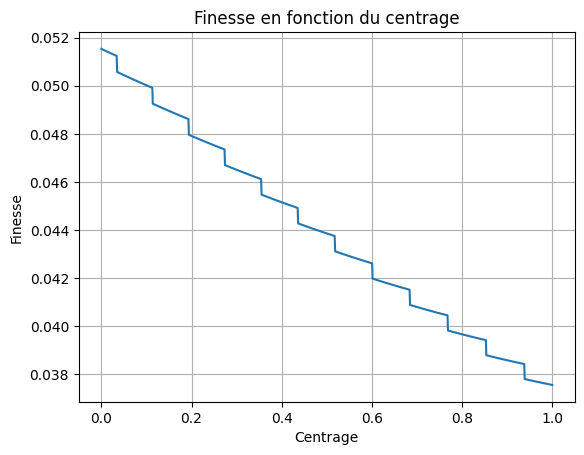

In [406]:
centrage = np.linspace(0,1, 1000)
sol = []
for c in centrage:
    aircraft.set_balance(c)
    aoa_range = np.linspace(np.deg2rad(-5), np.deg2rad(15), 100)
    cz = []
    cx = []
    l = []
    tas = aircraft.atm.tas_from_mach_altp(0.78, 5000)  # Vitesse indiquée en m/s
    trim = dynamic.get_trim_level_flight(aircraft, 5000, tas)
    for aoa in aoa_range:
        cz_, cx_, _ = aircraft.get_aero_coefs(aoa, 0.78, trim["dtrim"][0], 0, 0, 1)
        cz.append(cz_)
        cx.append(cx_)
        l.append((cx_, cz_, cz_/(cx_)**2))
    coup = max(l, key=lambda x: x[2])
    sol.append(coup[0])

plt.figure()
plt.plot(centrage, sol)
plt.xlabel("Centrage")
plt.ylabel("Finesse")
plt.title("Finesse en fonction du centrage")
plt.grid()
plt.show()


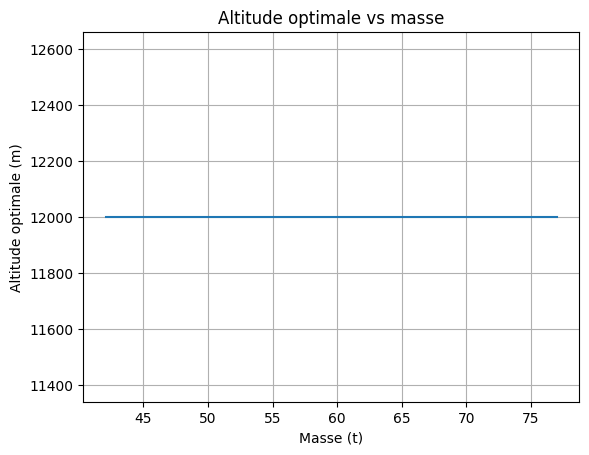

In [407]:
# ...existing code...
masses = np.linspace(aircraft.oem, aircraft.mtom, 10)
alt_opt = []
for m in masses:
    aircraft.set_mass(m)
    # Recherche de l'altitude où la poussée nécessaire est minimale à Mach 0.78
    altitudes = np.linspace(4000, 12000, 20)
    pouss = []
    for h in altitudes:
        tas = aircraft.atm.tas_from_mach_altp(0.78, h)
        try:
            trim = dynamic.get_trim_level_flight(aircraft, h, tas)
            pouss.append(trim["fu"][0])
        except:
            pouss.append(np.nan)
    idx = np.nanargmin(pouss)
    alt_opt.append(altitudes[idx])
plt.plot(masses/1000, alt_opt)
plt.xlabel("Masse (t)")
plt.ylabel("Altitude optimale (m)")
plt.title("Altitude optimale vs masse")
plt.grid()
plt.show()

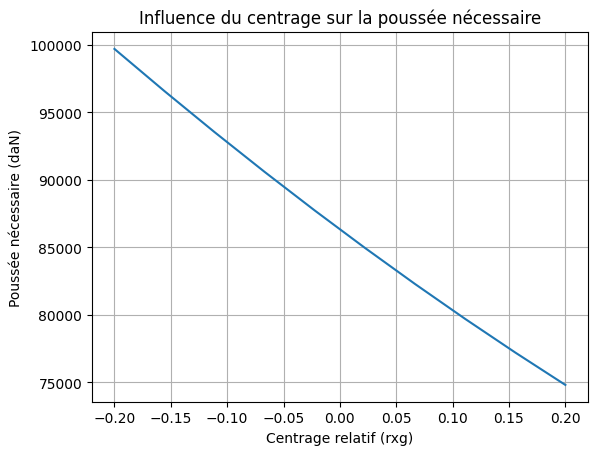

In [408]:
# ...existing code...
aircraft.set_mass(aircraft.mtom)
centrages = np.linspace(-0.2, 0.2, 10)  # Valeurs relatives à la corde
pouss = []
for rxg in centrages:
    aircraft.set_balance(rxg)
    tas = aircraft.atm.tas_from_mach_altp(0.78, 10000)
    try:
        trim = dynamic.get_trim_level_flight(aircraft, 10000, tas)
        pouss.append(trim["fu"][0])
    except:
        pouss.append(np.nan)
plt.plot(centrages, pouss)
plt.xlabel("Centrage relatif (rxg)")
plt.ylabel("Poussée nécessaire (daN)")
plt.title("Influence du centrage sur la poussée nécessaire")
plt.grid()
plt.show()